<a href="https://colab.research.google.com/github/prashanth018/Text-Summarization/blob/shreya/Evaluation_Seq2Seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import bs4 as bs
import urllib.request
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
!pip install rouge_metric

     |████████████████████████████████| 153kB 23.1MB/s 


In [3]:
import spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051305 sha256=706386545893aadd6c84fbee27d252b56a0a41a68313227437c17a98ba7777b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-_9sxnm8f/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [4]:
!pip install fuzzywuzzy

In [5]:
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149825 sha256=41cb44be910166dd290b219727f8779b16978ec2af7886a4c9f16aa7d9d718d5
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


In [6]:
from google.colab import files
uploaded = files.upload()

Saving output_v1.csv to output_v1.csv


In [7]:
dataset = pd.read_csv('output_v1.csv', encoding ='cp1252')
dataset['Predicted Summary'] = dataset['Predicted Summary'].str.split(n=1).str[1]
dataset['Original Summary'] = dataset['Original Summary'].str.split(n=1).str[1]

dataset

,Original Summary,Predicted Summary
0,nsui president accused of sexual harassment re...,will be given to power in mp bjp leader end
1,wanted father srk to be as suhana dad daughter...,i was not for my life ayushmann on simmba end
2,minor girl and her rapist thrashed in chhattis...,man held for raping woman in delhi boy held end
3,can wait for them to make the prime minister o...,i am not to be for not good army chief end
4,airtel payments bank losses rise over 11 in fy...,india to invest in india largest fund report end
5,union minister slapped at maharashtra event end,ex minister accused of rape accused of rape end
6,russia soyuz successfully at iss with astronau...,china launches first ever ever of the world end
7,christmas not religious affair for me but spec...,i am not to be for not good cji end
8,dad gave permission to bring at home salman end,i am the most expensive in the world games srk...
9,rishabh pant dropped from squad for australia ...,kohli 1st indian to slam odi ton in australia ...


In [8]:
hypotheses = list()
hypotheses.append(dataset['Predicted Summary'])
hypotheses
#hypotheses.append(result.split())

[0           will be given to power in mp bjp leader end
 1         i was not for my life ayushmann on simmba end
 2       man held for raping woman in delhi boy held end
 3            i am not to be for not good army chief end
 4      india to invest in india largest fund report end
 5       ex minister accused of rape accused of rape end
 6       china launches first ever ever of the world end
 7                   i am not to be for not good cji end
 8     i am the most expensive in the world games srk...
 9     kohli 1st indian to slam odi ton in australia ...
 10    hc rejects plea against twitter for violating end
 11    sc rejects plea against cbi chief over rafale ...
 12          india to build us nuclear capable of us end
 13    apple posts profit of its first ever ever ever...
 14                govt to give 000 crore to farmers end
 15    bjp leader wing leader arrested over attack on...
 16    pm modi inaugurates india longest oil imports end
 17        pm modi is not to po

In [9]:
references = list()
references.append(dataset['Original Summary'])

In [10]:
from rouge_metric import PyRouge
rouge = PyRouge(rouge_n=(1, 2, 4), rouge_l=True, rouge_w=True,
                rouge_w_weight=1.2, rouge_s=True, rouge_su=True, skip_gap=4)
scores = rouge.evaluate_tokenized(hypotheses, references)
print(scores)

{'rouge-1': {'r': 0.9941972920696325, 'p': 0.06079243051448847, 'f': 0.11457868925546143}, 'rouge-2': {'r': 0.8532019704433498, 'p': 0.0512699070510923, 'f': 0.09672735395956664}, 'rouge-4': {'r': 0.21084953940634596, 'p': 0.012223343024980715, 'f': 0.023107122826696577}, 'rouge-l': {'r': 0.9941972920696325, 'p': 0.06079243051448847, 'f': 0.11457868925546143}, 'rouge-w-1.2': {'r': 0.5103502134378829, 'p': 0.031259084521682974, 'f': 0.05890992092497168}, 'rouge-s4': {'r': 0.9516888433981576, 'p': 0.055171186138966356, 'f': 0.10429613011777902}, 'rouge-su4': {'r': 0.9589830508474576, 'p': 0.05593340978290957, 'f': 0.10570168883574951}}


In [11]:
from fuzzywuzzy import fuzz
fuzzy_ratio_list = []
for i in range(0,19):
  fuzz_ratio = fuzz.ratio(dataset['Predicted Summary'].iloc[i], dataset['Original Summary'].iloc[i])
  print(fuzz_ratio)
  fuzzy_ratio_list.append(fuzz_ratio)

40
48
47
48
48
53
38
45
47
49
38
45
49
36
42
44
44
37
54


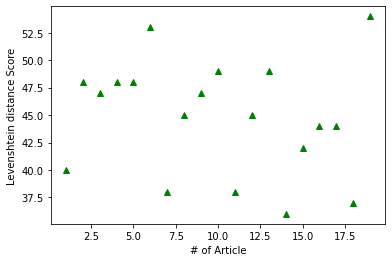

In [13]:
import matplotlib.pyplot as plt
p2 = plt.plot([1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19], fuzzy_ratio_list, 'g ^', label="bert")
plt.ylabel('Levenshtein distance Score')
plt.xlabel('# of Article')
#plt.legend(handles=[p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()